In [1]:
import cv2
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the pretrained model
model = tf.keras.models.load_model('final_model_V3.h5')

In [2]:
frame = cv2.imread("first.jpeg")

In [3]:
frame.shape

(1000, 1000, 3)

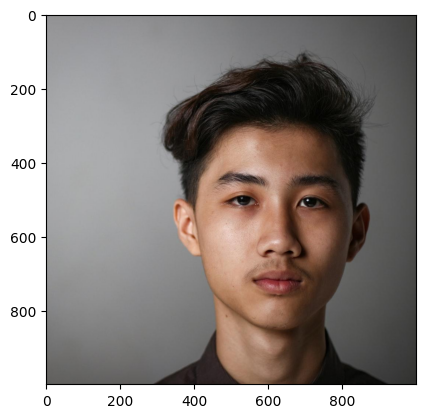

In [4]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [5]:
# we need face detection algorithm (gray Image)

faceCascade =  cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


In [6]:
gray.shape

(1000, 1000)

In [7]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0,0), 2) #BGR
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0:
        print("Face not detected")
    else:
        for (ex,ey, ew, eh) in faces:
            face_roi = roi_color[ey: ey+eh, ex: ex+ew]

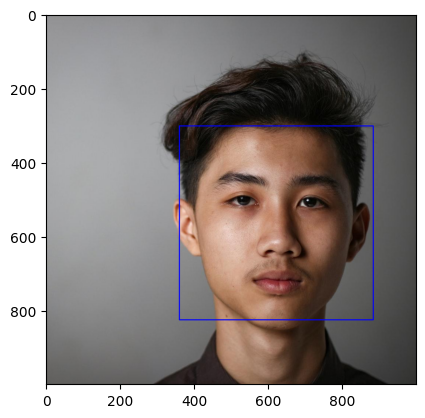

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

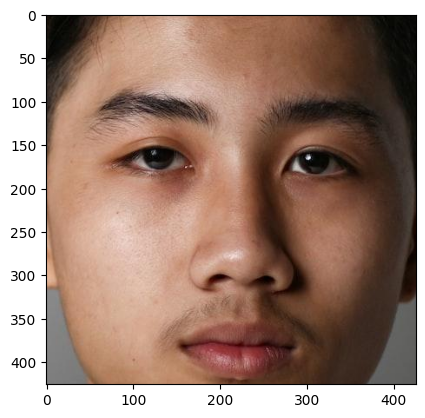

In [9]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [10]:
final_image = cv2.resize(face_roi, (48,48))
final_image = np.expand_dims(final_image, axis= 0)
final_image = final_image/255.0


In [11]:
prediction = model.predict(final_image)
prediction[0]


1/1 [==============================] - 0s 304ms/step


array([6.1160731e-03, 1.9847896e-05, 9.0079084e-03, 9.8485619e-01],
      dtype=float32)

In [12]:
np.argmax(prediction)

3

In [13]:
# Reatime video demo

!pip install opencv-contrib-python
!pip install deepface


  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/05/33/5a6436146bda09c69decc456cfb54f41d52fbcf558fe91e6df7bdde6cce0/opencv_contrib_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_contrib_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.8.0.76-cp37-abi3-win_amd64.whl (44.8 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Afortunado\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [14]:
import cv2
import numpy as np

path = "haarcascade_frontalface_default.xml"
font_scale = 1.5

font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle backrouund to white
rectangle_bgr = (255, 255,255)

# make a black image
img = np.zeros((500,500))

#set some text 
text = "some text in a box!"

# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font,fontScale = font_scale, thickness =1)[0]

# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] -25

# make the chords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y),(text_offset_x + text_width + 2, text_offset_y -text_height -2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr , cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale , color = (0,0,0), thickness = 1)

cap = cv2.VideoCapture(0)
# Check if the webcam is  opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    

while True:
    ret, frame = cap.read()
    
    if not ret:
        continue 
    
    faceCascade =  cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0,0), 2) #BGR
        faces = faceCascade.detectMultiScale(roi_gray)
        if len(faces) == 0:
            print("Face not detected")
        else:
            for (ex,ey, ew, eh) in faces:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew] # crop the image
            
    final_image = cv2.resize(face_roi, (48,48))
    final_image = np.expand_dims(final_image, axis = 0) # need fourth dimension
    final_image = final_image/255.0
    
    font = cv2. FONT_HERSHEY_SIMPLEX
    
    predictions = model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (np.argmax(predictions) == 0):
        status = "Angry"
        
        x1, y1, w1, h1 = 0,0, 175, 75
        # draw black backgound rectangle 
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 +h1), (0,0,0),-1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
                    
        cv2.putText(frame, status, (100, 150) , font, 3, (0,0,255),2, cv2.LINE_4)
                    
        cv2.rectangle(frame, (x,y), (x + w, y+h), (0,0,255))
                      
    elif (np.argmax(predictions) == 1):
        status = "Happy"
                      
        x1, y1, w1, h1 = 0,0, 175, 75
        # draw black backgound rectangle 
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 +h1), (0,0,0),-1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
                    
        cv2.putText(frame, status, (100, 150) , font, 3, (0,0,255),2, cv2.LINE_4)
                    
        cv2.rectangle(frame, (x,y), (x + w, y+h), (0,0,255))
                      
    elif (np.argmax(predictions) == 2):
        status = "Neutral"
                      
        x1, y1, w1, h1 = 0,0, 175, 75
        # draw black backgound rectangle 
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 +h1), (0,0,0),-1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
                    
        cv2.putText(frame, status, (100, 150) , font, 3, (0,0,255),2, cv2.LINE_4)
                    
        cv2.rectangle(frame, (x,y), (x + w, y+h), (0,0,255))
        
    elif (np.argmax(predictions) == 3):
        status = "Sad"
        
        x1, y1, w1, h1 = 0,0, 175, 75
        # draw black backgound rectangle 
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 +h1), (0,0,0),-1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
                    
        cv2.putText(frame, status, (100, 150) , font, 3, (0,0,255),2, cv2.LINE_4)
                    
        cv2.rectangle(frame, (x,y), (x + w, y+h), (0,0,255))
        
                      
    # Use putText() method for 
    # interesting text on video
                      
    cv2.imshow("face emotion Recognition ", frame)
                      
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
                      
cap.release()
cv2.destroyAllWindows()
                      
          

1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 24ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step


Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Fa

1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 24ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/1 [===============

1/1 [==============================] - 0s 24ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 24ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [===============

Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/

1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 24ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 24ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [===============

1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 36ms/step
Face not detected
1/1 [===============

Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/